# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [6]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Columns with missing values:
description                       873
neighborhood_overview           18584
picture_url                         1
host_name                           6
host_since                          6
host_location                    7553
host_about                      16291
host_response_time               4229
host_response_rate               4229
host_acceptance_rate             3712
host_is_superhost                2101
host_thumbnail_url                  6
host_picture_url                    6
host_neighbourhood              13451
host_listings_count                 6
host_total_listings_count           6
host_verifications                  6
host_has_profile_pic                6
host_identity_verified              6
neighbourhood                   18584
neighbourhood_group_cleansed    35172
bathrooms                        3570
bathrooms_text                     24
bedrooms                          727
beds                             3568
price                

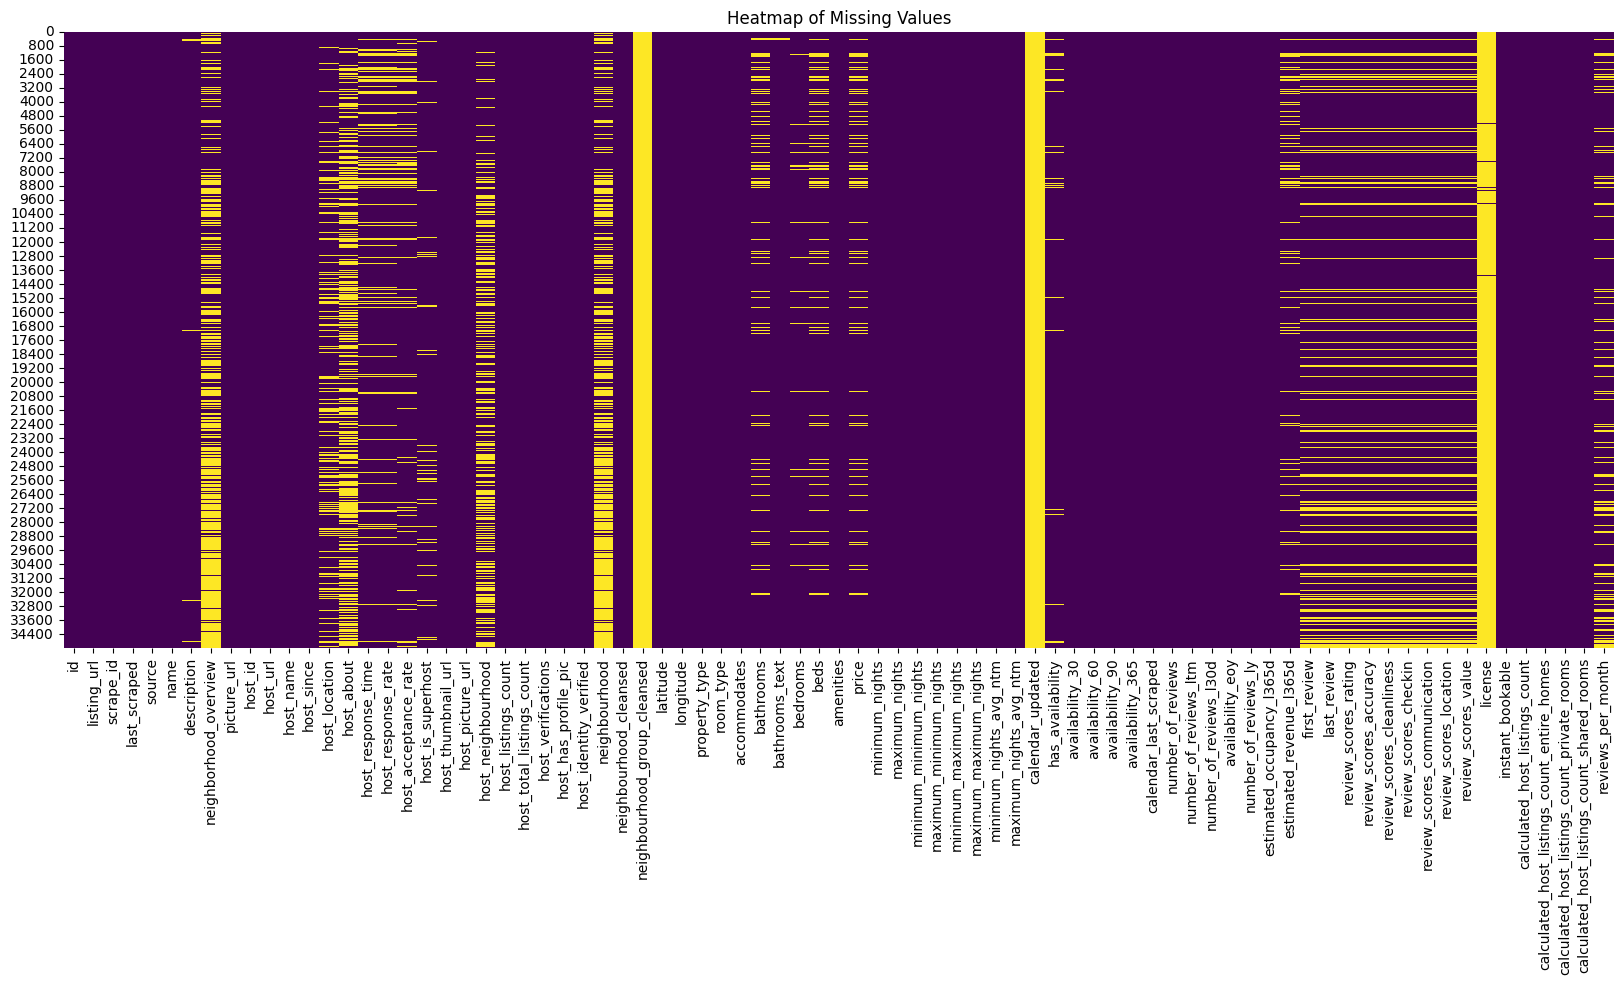

Top 3 columns with the most missing values:
neighbourhood_group_cleansed    35172
calendar_updated                35172
license                         34782
dtype: int64


### ✍️ Your Response: 🔧
1. Neighbourhood_group_cleansed, calendar_updated, and license.

2. Columns with a very high number of missing values like neighbourhood_group_cleansed, calendar_updated, and license are likely to create business issues if they are crucial for analysis, reporting, or operational processes that rely on complete data in these fields.

3. Columns with a very high percentage of missing values, such as neighbourhood_group_cleansed, calendar_updated, and license, could potentially be safely ignored or dropped if the information they contain is not essential for the analysis or if imputing the large number of missing values would introduce significant bias. The decision to drop should be made based on the specific business questions being asked.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35172 non-null  int64  
 1   listing_url                                   35172 non-null  object 
 2   scrape_id                                     35172 non-null  int64  
 3   last_scraped                                  35172 non-null  object 
 4   source                                        35172 non-null  object 
 5   name                                          35172 non-null  object 
 6   description                                   34299 non-null  object 
 7   neighborhood_overview                         16588 non-null  object 
 8   picture_url                                   35171 non-null  object 
 9   host_id                                       35172 non-null 

### ✍️ Your Response: 🔧
1. I dropped the columns neighbourhood_group_cleansed, calendar_updated, and license.

2. These columns had a very high percentage of missing values, making them unreliable for analysis or reporting. neighbourhood_group_cleansed and license were almost entirely empty, providing little to no useful information. calendar_updated also had a significant amount of missing data.

3. Leaving columns with a large number of missing values can lead to inaccurate analysis, biased models, and dashboards that are incomplete or misleading. Imputing such a large amount of missing data could also introduce significant errors. They also add unnecessary complexity and size to the dataset.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

Missing values after filling:
price                   0
review_scores_rating    0
dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1598076351.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/tmp/ipython-input-1598076351.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(median_price, inplace=True)
/tmp/ipython-input-1598076351.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignmen

### ✍️ Your Response: 🔧
1. I cleaned the price and review_scores_rating columns.

2. For both price and review_scores_rating, I filled the missing values with the median of the respective columns. I used the median because it is less sensitive to outliers compared to the mean, which can be beneficial in datasets that might have extreme values. Before filling the price column, I also removed the '$' and ',' characters and converted the column to a float data type so that the median calculation and filling could be performed correctly.

3. Filling missing values with the median can introduce a bias into the data, especially if a large percentage of values were missing. It might not accurately reflect the true distribution of prices or review scores for the missing entries. This could potentially lead to skewed analysis or models that don't generalize well to unseen data.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


Data type of 'price' column: float64

Summary statistics for 'price' column:
count    3.517200e+04
mean     8.984003e+04
std      1.329586e+06
min      2.600000e+02
25%      3.076100e+04
50%      3.990800e+04
75%      5.475800e+04
max      1.050217e+08
Name: price, dtype: float64


### ✍️ Your Response: 🔧
1. I fixed the price column.

2. I removed the '$' and ',' characters from the price column and then converted its data type from object to float. I also filled the missing values in this column with the median.

3. Converting the price column to a numeric data type (float) allows for mathematical operations, calculations, and numerical analysis to be performed on the prices. This is essential for tasks such as calculating average prices, analyzing price distributions, creating visualizations involving price, or using price as a feature in machine learning models. Handling missing values also ensures that analyses and models are not affected by incomplete data.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


Number of rows with duplicate IDs before dropping: 0
Number of rows after dropping duplicates: 35172


### ✍️ Your Response: 🔧 🔧
1. Based on the output of the previous cell, there were no duplicate IDs found in the dataset before dropping.

2. Although no duplicates were found in this specific run based on the 'id' column, if duplicates were present, the standard approach used (keep='first') would keep the first occurrence of a duplicate row and drop the subsequent ones. This assumes that the first record is the most accurate or primary entry.

3. Duplicates can skew analysis and reporting (e.g., inflating the number of listings or revenue estimates), lead to inaccurate insights for business decisions, and create a poor user experience if the same listing appears multiple times.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. The most challenging part was deciding how to handle the columns with a very high percentage of missing values, such as neighbourhood_group_cleansed and license. It required careful consideration of whether the information was truly necessary for analysis or if dropping the columns was the most appropriate action.  
2. Decisions on dropping, fixing, or keeping data were based on the extent of missing values, the potential business relevance of the column, and the feasibility of imputation without introducing significant bias. Columns with a vast majority of missing values were dropped, while columns with fewer missing values that were important for analysis were considered for imputation (like price and review_scores_rating).  
3. Pricing analysts could greatly benefit from the cleaned data, particularly the price and review_scores_rating columns. With consistent data types and filled missing values, they can perform accurate analysis on pricing trends, understand the relationship between price and review scores, and develop more effective pricing strategies.  
4. If I had more time, I would explore other columns with missing values, such as host_response_time and host_response_rate, to see if there are patterns in the missingness and if a more sophisticated imputation method or flagging strategy would be beneficial. I would also look into the amenities column, which is currently a string, to see if it can be parsed into a more structured format for analysis.  
5. This assignment directly relates to my learning outcome of gaining practical experience in data preprocessing techniques, as I applied various methods for handling missing values, correcting data types, and removing duplicates.  


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [21]:
!jupyter nbconvert --to html "assignment_06_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook assignment_06_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 585936 bytes to assignment_06_ChristensenBryson.html
